<a href="https://colab.research.google.com/github/ajlm21/ProjectBankmark/blob/main/Optimizando_Campa%C3%B1as_de_Marketing_para_Aumentar_Suscripciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

El dataset de Bank Marketing contiene información detallada sobre campañas de marketing directas realizadas por un banco portugués. Estas campañas se llevaron a cabo a través de llamadas telefónicas, con el objetivo de convencer a los clientes de suscribir un depósito a plazo fijo.

🏢**Contexto Empresarial**: En el sector bancario, las instituciones financieras buscan constantemente estrategias efectivas para atraer y retener clientes. Una de las tácticas más utilizadas es la campaña de marketing directo, que permite a los bancos comunicarse de manera personalizada con sus clientes potenciales. El banco en cuestión ha implementado varias campañas de marketing directo a través de llamadas telefónicas, con el objetivo de promover la suscripción de depósitos a plazo fijo.

🧑**Tipo de Audiencia**: El análisis está dirigido a los ejecutivos de marketing y analistas de datos del banco, así como a los directores de producto y gerentes de relaciones con clientes.

📑**Problema Comercial**: A pesar de los esfuerzos en las campañas de marketing, el banco ha observado que la cantidad de clientes que suscriben depósitos a plazo fijo es menor de lo esperado. El desafío radica en identificar los factores clave  en optimizar las estrategias de marketing para aumentar la efectividad de las campañas.

🧮**Contexto Analítico**: Para abordar este problema, se ha recopilado un dataset detallado que incluye información sobre los clientes, las características de las campañas y los indicadores socioeconómicos.

# **Importación de Dataset y librerias**


In [1]:
#Importación Dataset

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df= pd.read_csv("/content/drive/MyDrive/Datasets/bank.csv", sep=";")
df.head()

Mounted at /content/drive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.0 MB/s eta 0:00:00


In [3]:
pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00


In [4]:
#Importación librerias

import numpy as np
import sklearn
sklearn.__version__
import missingno as ms
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display
import dash
import dash_table
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd


# Librerias de Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Sklearn Librerias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

# **Descripcion del dataset ✏**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### **Descripción de Columnas**

**age** (numérica): Edad del cliente en años.

**job** (categórico): Ocupación principal del cliente. Categorías: Administrador, Desconocido, Desempleado, Dirección, Empleada doméstica, Empresario, Estudiante, Obrero, Trabajador por cuenta propia, Jubilado, Técnico, Servicios.

**marital** (categórico): Estado civil actual del cliente. Categorías: Casado, Divorciado, Soltero.

**Education** (categórica): Nivel educativo más alto alcanzado. Categorías: Desconocido, Secundaria, Primaria, Terciaria.

**default** (binario): Indica si el cliente tiene alguna deuda en mora. Valores: Sí, No.

**Balance** (numérico): Promedio anual del saldo de la cuenta del cliente, expresado en euros.

**housin** (binario): Indica si el cliente tiene un préstamo hipotecario. Valores: Sí, No.

**loan** (binario): Indica si el cliente tiene algún otro tipo de préstamo personal (distinto a la hipoteca). Valores: Sí, No.

**Contact** (categórico): Medio principal utilizado para contactar al cliente. Categorías: Desconocido, Teléfono, Celular.

**Day** (numérico): Día del mes en el que se realizó el último contacto con el cliente.

**Month** (categórico): Mes del año en el que se realizó el último contacto con el cliente.

**Duration** (numérico): Tiempo en segundos que duró la última llamada con el cliente.

**Campaign** (numérico): Número total de contactos realizados con el cliente durante la campaña actual.

**pdays** (numérico): Número de días transcurridos desde el último contacto con el cliente en una campaña anterior. Un valor de -1 indica que no hubo contactos previos.

**previous** (numérico): Número total de contactos realizados con el cliente en campañas anteriores.

**poutcome** (categórico): Resultado de la última campaña de marketing con este cliente. Categorías: Desconocido, Otro, Fracaso, Éxito.

**Deposit** (binario): Indica si el cliente tiene contratado un depósito a plazo fijo en la entidad bancaria. Valores: Sí, No.

In [6]:
df.agg(["min","max"]).T

,min,max
age,18,95
job,admin.,unknown
marital,divorced,single
education,primary,unknown
default,no,yes
balance,-6847,81204
housing,no,yes
loan,no,yes
contact,cellular,unknown
day,1,31


Aqui podemos observar los datos minimoss y maximos por cada variable del dataset a utilizar.

In [7]:
nRow, nCol= df.shape

print(f'Contiene {nRow} filas y {nCol} columnas')

Contiene 11162 filas y 17 columnas


# **Data Wrangling ⚒**

**Comprobando Duplicados**

In [8]:
#Chequeando si existe duplicados
df[[x for x in df.columns if x != "ID"]][df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [9]:
# Cantidad de valores duplicado por columnas

df.duplicated().sum()

0

In [10]:
# Cantidad de Valores nulos por columnas

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Text(0.5, 1.0, 'Valores Faltantes')

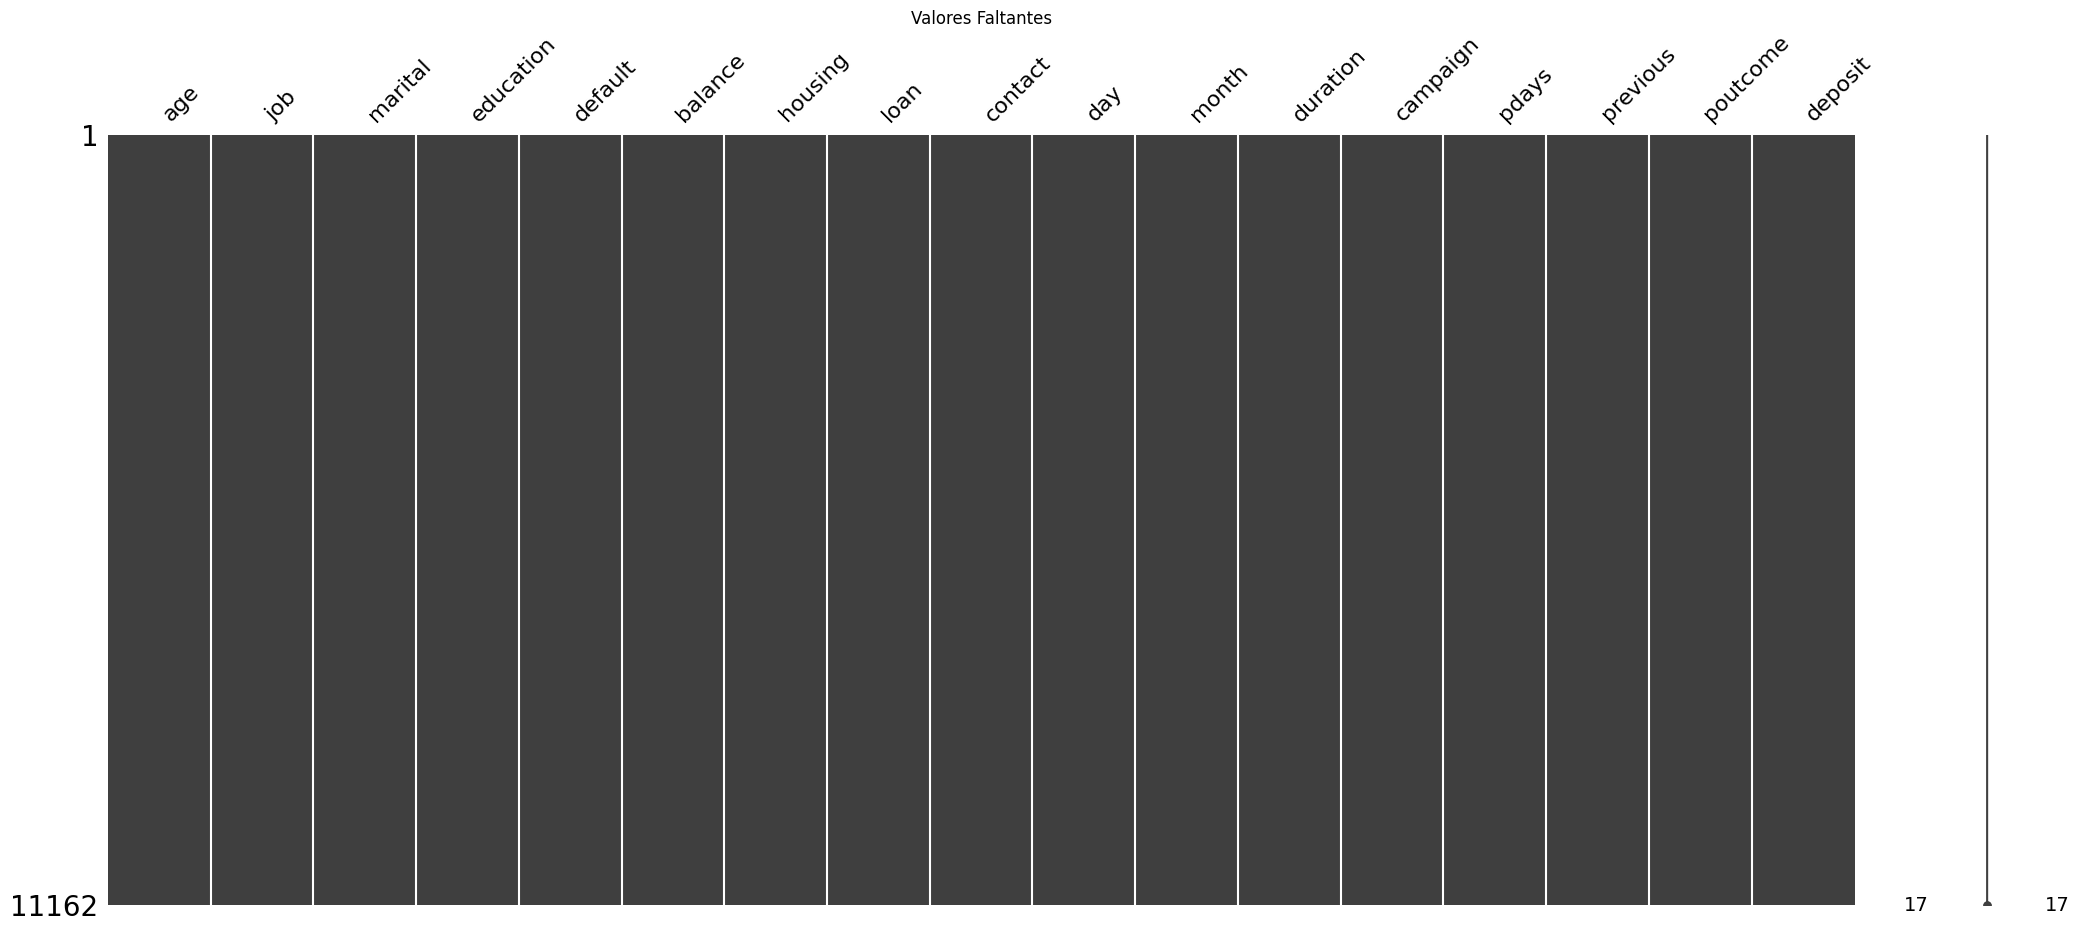

In [11]:
ms.matrix(df)

plt.title("Valores Faltantes")

Podemos ver que la mayorias de las variables no contienen datos NA, exceptuando la variable income que contiene algunos pocos datos , adicionalmente no se encuentran valores duplicados.

In [12]:
#Eliminar filas con valoras NA

df.dropna(inplace=True)

In [13]:
#Agrego una variable cualitativa relacionada con la edad que
#nos permita fácilmente visualizar los diferentes grupos

def clasificar_edad(e):
  if e < 30:
    return "Joven"
  elif e < 45:
     return "Adulto Joven"
  elif e < 60:
        return "Adulto"
  else:
          return "Adulto Mayor"

df["edad_grupo"] = df["age"].apply(clasificar_edad)

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,edad_grupo
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Adulto
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Adulto
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Adulto Joven
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Adulto
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,Adulto Joven
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,Adulto Joven
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,Adulto Joven
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,Adulto Joven


**Conclusiones**

**Calidad de los dato**s: El conjunto de datos se encuentra en buen estado. No se detectaron duplicados y la cantidad de valores faltantes es mínima, limitándose a la variable "income", los cuales fueron eliminados.

**Ingeniería de características**: Se creó una nueva variable, "grupo_edad", para enriquecer el análisis.

# **Análisis Exploratorio EDA 📊**

## **Caracteristicas de clientes contactados**

### **Edad**

In [15]:
#Lista de personas por edades

Edades= df[['age','job']].groupby(['age']).count().reset_index()

#Renombrando la columna 'job' a 'personas_por_edad'
Edades= Edades.rename(columns={'job': 'personas_por_edad'})

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Función para paginar los datos
def paginate_data(Edades, page_size, page):
    return Edades[(page - 1) * page_size: page * page_size]

# Layout de la aplicación
app.layout = html.Div([
    dcc.Dropdown(
        id='page-select',
        options=[{'label': i, 'value': i} for i in range(1, 10)],
        value=1
    ),
    dash_table.DataTable(
        id='table',
        columns=[{'name': i, 'id': i} for i in Edades.columns],
        data=[]
    )
])

# Callback para actualizar la tabla
@app.callback(
    Output('table', 'data'),
    [Input('page-select', 'value')]
)
def update_table(page):
    page_size = 10
    return paginate_data(Edades, page_size, page).to_dict('records')

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [16]:
#Top 10
Top_10_Edades= df[['age','job']].groupby(by=['age']).count().reset_index()

#Renombrando la columna 'job' a 'top'

Top_10_Edades= Top_10_Edades.rename(columns={'job': 'top'})

Top_10_Edades= Top_10_Edades.sort_values(by='top', ascending=False).head(10)
Top_10_Edades

,age,top
13,31,496
14,32,477
16,34,466
15,33,464
17,35,461
12,30,456
18,36,432
19,37,370
20,38,353
21,39,343


In [17]:
# Grupo por edad
# 18 a 30 Joven
# 31 a 45 Adulto Joven
# 46 a 60 Adulto
# 61 en adelante Adulto Mayor

Grupo_edad= df[['age','edad_grupo']].groupby(by=['edad_grupo']).count().reset_index()
Grupo_edad

,edad_grupo,age
0,Adulto,3106
1,Adulto Joven,5725
2,Adulto Mayor,780
3,Joven,1551


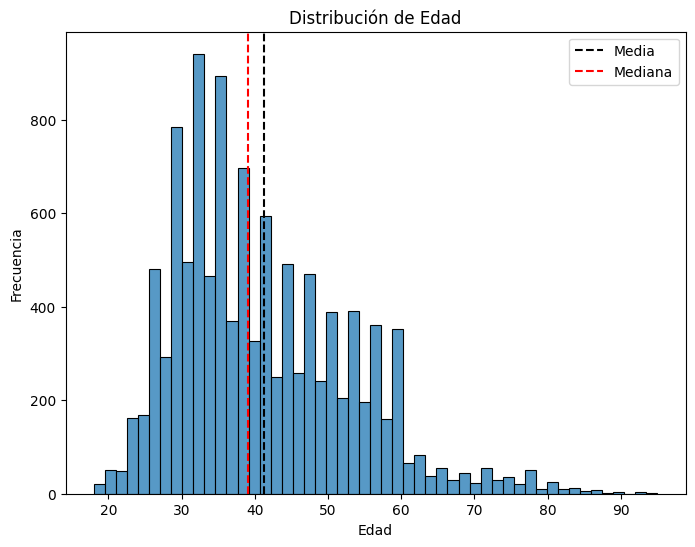

El promedio de edad es: 41.231947679627304
La mediana de edad es: 39.0


In [18]:
#Distribición edad

plt.figure(figsize=(8,6))

ax= sns.histplot(data=df, x='age', edgecolor='black')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label="Media")
plt.axvline(x=df['age'].median(),color='r',linestyle ="--",label="Mediana")
plt.legend()

ax.set_title('Distribución de Edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')

Promedio_edad= df['age'].mean()
Mediana_edad= df['age'].median()

plt.show()
print(f"El promedio de edad es: {Promedio_edad}")
print(f"La mediana de edad es: {Mediana_edad}")

In [19]:
# Distribución de edad vs Trabajo

fig=px.box(df,x='job',y='age',color='job',title='<b>Distribución de edad con respecto al tipo de trabajo')
fig.update_layout(title_x=0.5,font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.show()




Podemos observar que la mayoría de las categorías laborales tienen una mediana de edad entre 37 y 42 años. Sin embargo, hay excepciones notables en las categorías de retirados, desempleados, amas de casa, desconocidos y estudiantes. La categoría con la mayor edad es la de retirados, mientras que los estudiantes son el grupo con la menor edad. Este gráfico ilustra claramente las diferencias en la distribución de edades según el tipo de trabajo, destacando patrones y desviaciones interesantes.

In [20]:
# Edad vs Balance

fig = px.scatter(df, x='age', y='balance', color= 'edad_grupo', title="<b>Edad vs Balance")
fig.update_layout(title_x=0.5,font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [21]:
# Contacto promedio de balance por grupo de edad
Balance_pro= df[['balance','edad_grupo']].groupby(by=['edad_grupo']).mean().reset_index()
Balance_pro

,edad_grupo,balance
0,Adulto,1669.934965
1,Adulto Joven,1386.050480
2,Adulto Mayor,2721.180769
3,Joven,1171.546744


In [22]:
# Contacto de campaña por grupo de edad
Grupo_campaign= df[['campaign','edad_grupo']].groupby(by=['edad_grupo']).count().reset_index()


fig= px.bar(Grupo_campaign, x='edad_grupo', y='campaign', color='edad_grupo' , title= "<b>Contacto por grupo de edad")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))


fig.show()



El grupo que mas recibe contactos son los adultos jóvenes con 5.725 llamadas recibidas, le siguen los adultos con 3.106, los jóvenes con 1.551 y por ultimo los adultos mayores con 780.


In [23]:
# Contacto promedio de campaña por grupo de edad
Grupo_campaign= df[['campaign','edad_grupo']].groupby(by=['edad_grupo']).mean().reset_index()
Grupo_campaign

,edad_grupo,campaign
0,Adulto,2.620090
1,Adulto Joven,2.585852
2,Adulto Mayor,2.044872
3,Joven,2.232108


In [24]:
#Duración promedio llamadas por grupo de edad

Grupo_duration= df[['duration','edad_grupo']].groupby(by=['edad_grupo']).mean().reset_index()

fig= px.bar(Grupo_duration, x='edad_grupo', y='duration', color='edad_grupo' , title= "<b>duración promedio por grupo de edad")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

La duración promedio por grupo de edad se encuentra entre 364 y 384 segundos

In [25]:
fig=px.box(df,x='deposit',y='age',color='deposit',title='<b>Distribución de edad con respecto al deposito')
fig.update_layout(title_x=0.5,font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

La mediana de edad de los clientes contactados que acceden a inscribirse a los depositos a plazo es de 38 años y de los clienes que no acceden la edad mediana es de 39.

In [26]:
#Distribución de depositos por grupo

Grupo_deposit = df.groupby(['edad_grupo','deposit'], as_index= False)['age'].count()
Grupo_deposit= Grupo_deposit.rename(columns={'age': 'count'})

fig= px.bar(Grupo_deposit, x='edad_grupo', y= 'count', color='deposit', barmode='group', text='count',  title= "<b>Distribución de depositos por Grupo de edad")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

Se observa que:

La mayoría de los clientes, independientemente de su edad, prefieren no suscribirse a depósitos a plazo.
El grupo de edad "Adulto Joven" es el segmento de mercado más grande.
El grupo de edad "Adulto Mayor" muestra un mayor interés en los depósitos a plazo en comparación con otros grupos.

### **Trabajo**

In [27]:
# Grafico de Barras Edad vs Trabajo

Edad_Trabajo= df[['age','job']].groupby(by=['job']).count().reset_index()

#Renombrando la columna 'age' a 'personas_por_trabajo'

Edad_Trabajo= Edad_Trabajo.rename(columns={'age': 'personas_por_trabajo'})

fig= px.bar(Edad_Trabajo, x='job', y='personas_por_trabajo', color='job' , text='personas_por_trabajo', title= "<b>Distribución de personas por tipo de trabajo")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

In [28]:
# Grafico de Barras Trabajo vs Balance

Balance_Trabajo= df[['job', 'balance']].groupby(by=['job']).mean().reset_index()

fig= px.bar(Balance_Trabajo, x='job', y='balance',  title= "<b>Distribución de balance por tipo de trabajo")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

El análisis del gráfico de barras evidencia una marcada diferencia en los saldos promedio, siendo los emprendedores, gerentes, trabajadores autónomos y jubilados los que presentan los montos más altos. Estos grupos destacan significativamente por encima del resto

In [29]:
Trabajo_deposit = df.groupby(['job','deposit'], as_index= False)['age'].count()
Trabajo_deposit= Trabajo_deposit.rename(columns={'age': 'count'})

fig= px.bar(Trabajo_deposit, x='job', y= 'count', color='deposit', barmode='group', text='count',  title= "<b>Distribución de depositos por tipo de trabajo")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

Se observa que:

La decisión de tener o no un depósito a plazo parece estar influenciada por el tipo de trabajo.
Los retirados y algunos otros grupos profesionales con mayor estabilidad financiera tienden a tener una mayor proporción de depósitos a plazo.
Los jóvenes, estudiantes y desempleados muestran una menor propensión a suscribirse a este tipo de productos.

### **Estado Civil**

In [30]:
estatus_m= df.marital.value_counts().reset_index()
estatus_m

,marital,count
0,married,6351
1,single,3518
2,divorced,1293


In [31]:
marital_status= df[['marital','deposit','age']].groupby(by=['marital','deposit']).count().sort_values(by='age', ascending=False).reset_index()
marital_status= marital_status.rename(columns={'age': 'count'})

marital_status


,marital,deposit,count
0,married,no,3596
1,married,yes,2755
2,single,yes,1912
3,single,no,1606
4,divorced,no,671
5,divorced,yes,622


In [32]:
marital_status = df.groupby(['marital','deposit'], as_index=False)['deposit'].count()
marital_status= marital_status.rename(columns={'deposit': 'count'})


fig=px.pie(marital_status,names='marital',values= 'count', title='<b>Distribución de estado civil')
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

In [33]:
fig= px.box(df, x='marital', y= 'balance', color='deposit', boxmode='group',  title= "<b>Distribución de depositos por estado civil")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

Se observa que:

Independientemente del estado civil, la mayoría de las personas no tiene depósitos a plazo.
No hay una relación clara entre el estado civil y la tenencia de depósitos a plazo. Si bien hay algunas diferencias numéricas, estas podrían deberse a otros factores no considerados en esta tabla, como la edad, el ingreso o el nivel educativo.

### **Educación**

In [34]:
# Total Niveles educativos

Educacion_count= df[['education','deposit']].groupby(by=['education']).count().reset_index()
Educacion_count= Educacion_count.rename(columns={'deposit': 'count'})
Educacion_count

,education,count
0,primary,1500
1,secondary,5476
2,tertiary,3689
3,unknown,497


In [35]:
#Grafico de Barra por tipo de eduación

fig=px.bar(Educacion_count, x='education', y='count', color='education', text='count', title= "<b>Distribución de educación")
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

In [36]:
# Distribución de balance vs educación

fig=px.box(df,x='education',y='balance',color='education',title='<b>Distribución de balance con respecto al tipo de educación')
fig.update_layout(title_x=0.5,font_family="Times New Roman")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [37]:
education_deposit = df.groupby(['education','deposit'], as_index= False)['age'].count()
education_deposit= education_deposit.rename(columns={'age':'count'})

fig= px.bar(education_deposit, x='education', y= 'count', color='deposit', barmode='group', text='count',  title= "<b>Distribución de depositos por tipo de educación")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

Se observa que:

Educación Secundaria y Terciaria: Mayor cantidad de personas con depósitos a plazo, sugiriendo una mayor propensión a ahorrar.

Educación Primaria: Menor proporción de personas con depósitos a plazo, posiblemente debido a menos recursos o preferencia por otros instrumentos de ahorro.

Educación Desconocida: Alta cantidad de individuos sin depósitos a plazo, dificultando una interpretación clara por falta de información.

### **Meses**

In [38]:
#Meses

Meses_count= df[['month','job']].groupby(by=['month']).count().reset_index()
Meses_count= Meses_count.rename(columns={'job': 'count'})
Meses_count

,month,count
0,apr,923
1,aug,1519
2,dec,110
3,feb,776
4,jan,344
5,jul,1514
6,jun,1222
7,mar,276
8,may,2824
9,nov,943


In [39]:
#Grafico cantidad de contacto por meses

fig= px.bar(Meses_count, x='month', y='count', text='count', color= 'month', title= "<b>Cantidad de contactos por meses")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))


Se observa que hay una mayor cantidad de contactos entre los meses de mayoa a agosto.

In [40]:
meses_deposit = df.groupby(['month','deposit'], as_index= False)['age'].count()
meses_deposit= meses_deposit.rename(columns={'age':'count'})

fig= px.bar(meses_deposit, x='month', y= 'count', color='deposit', barmode='group', text='count',  title= "<b>Distribución de depositos por meses")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

El gráfico muestra una variación mensual en la contratación de depósitos a plazo, con los meses de mayo a agosto destacando por tener una mayor cantidad de suscripciones.

### **Créditos Clientes**

In [41]:
# Graficos de Creditos hipotecarios y personales

Housing_count = df.groupby(by=['housing'])['job'].count().reset_index()
Housing_count.rename(columns={'job': 'count'}, inplace=True)

loan_count = df.groupby(by=['loan'])['job'].count().reset_index()
loan_count.rename(columns={'job': 'count'}, inplace=True)

#  Crear una figura con 1 filas y 2 columnas
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "bar"}]],
                    subplot_titles=('Loan', 'Housing'))

# # Agregar un gráficos de barras
fig.add_trace(go.Bar(x=Housing_count['housing'], y=Housing_count['count']), row=1, col=1)
fig.add_trace(go.Bar(x=loan_count['loan'], y=loan_count['count']), row=1, col=2)


### **Campaña**

In [42]:
# Campaña deposito
Campaña = df.groupby(['campaign','deposit'], as_index= False)['age'].count()
Campaña= Campaña.rename(columns={'age':'count'})

fig= px.line(Campaña, x='campaign', y= 'count', color='deposit',  title= "<b>Distribución de depositos por contactos campaña")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()


Ambas líneas (azul y roja) muestran una tendencia a la baja a medida que aumenta el número de contactoso de la campaña. Esto sugiere que a medida que se realizan más conctatos al cliente durante la campaña, genera una disminución en las suscripciones.

In [43]:
# Campaña previa deposito
Campaña_previa = df.groupby(['previous','deposit'], as_index= False)['age'].count()
Campaña_previa= Campaña_previa.rename(columns={'age':'count'})

fig= px.line(Campaña_previa, x='previous', y= 'count', color='deposit',  title= "<b>Distribución de depositos por contactos campaña previa")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

Los resultados de la campaña previa parecen confirmar la tendencia observada en la campaña actual: existe un punto óptimo en el número de contactos, mientras mas conctactos se realizen menos probabilidad de suscripcion existe.

In [44]:
#Resultado campaña

Resultado_Campaña = df.groupby(['poutcome','deposit'], as_index= False)['age'].count()
Resultado_Campaña= Resultado_Campaña.rename(columns={'age':'count'})

fig= px.bar(Resultado_Campaña, x='poutcome', y= 'count', color='deposit', barmode='group', text='count',  title= "<b>Distribución de depositos con respecto al resultado de la campaña")
fig.update_layout(title_x=0.5)

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(title_x=0.5,title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(width=1,color='black')))

fig.show()

# **Modelos Machine Learning**

In [45]:
# Conjunto de entrenamiento
X= df.drop(columns=['deposit'])
y= df['deposit']

In [46]:
#Transformando data para el modelo.
y=y.replace({'yes':1,'no':0})

In [47]:
# Separacion de variables categoricas, numericas y passthroug

variables_numericas= X[['age','balance','day','duration','pdays']].columns.tolist()
variables_categoricas= X.select_dtypes(exclude='number').columns.tolist()
variables_passthrough= X[['campaign','previous']].columns.tolist()



In [ ]:
variables_numericas

['age', 'balance', 'day', 'duration', 'pdays']

In [ ]:
variables_passthrough

['campaign', 'previous']

In [ ]:
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'edad_grupo']

Conjunto de características (X): Contiene todas las variables que se utilizarán para predecir la variable objetivo. En este caso, se están eliminando todas las columnas excepto la columna "deposit".

Variable objetivo (y): Representa la variable que queremos predecir. En este caso, es la columna "deposit", que indica si un cliente se suscribió o no a un depósito a plazo (sí o no).

In [48]:
#Conjunto de entrenamiento

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [49]:
# reescalamiento numerico

preprocesamiento_numericas = Pipeline(steps=[('Reescalar', StandardScaler())
])

# Imputacion y one hot encoding categorico

preprocesamiento_categoricas = Pipeline(steps=[
    ('Recodificar', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

## Transformador (aplica el preprocesamiento)

preprocessor = ColumnTransformer(transformers=[
    ('Numeros', preprocesamiento_numericas, variables_numericas),
    ('Categorias', preprocesamiento_categoricas, variables_categoricas),
     ('passthrough', 'passthrough', variables_passthrough)

],
        verbose_feature_names_out=True,   ### Agrega prefijo
)

Este fragmento de código en Python se utiliza para preparar los datos antes de alimentarlos a un modelo de machine learning. Se enfoca en dos tareas principales:

**StandardScaler**: Este transformador estandariza las características numéricas, esto asegura que todas las características numéricas tengan la misma escala.

**OneHotEncoder**: Convierte las variables categóricas en una representación numérica que los algoritmos puedan entender. Crea nuevas columnas binarias (0 o 1) para cada categoría única.

Combinación de ambos:

**ColumnTransformer**: Combina los transformadores anteriores para aplicarlos a diferentes columnas del DataFrame.

In [50]:
from sklearn.feature_selection import RFECV


## **Modelo Random Forest**

In [ ]:
rf = RandomForestClassifier()
Modelo_RandomForest= Pipeline([('prepocesador',preprocessor),
                               ('selector', RFECV(rf)),
                               ('modelo', RandomForestClassifier())])

In [ ]:
#Entrenamiento
Modelo_RandomForest.fit(X_train,y_train)

Pipeline(steps=[('prepocesador',
                 ColumnTransformer(transformers=[('Numeros',
                                                  Pipeline(steps=[('Reescalar',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('Categorias',
                                                  Pipeline(steps=[('Recodificar',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'edad_grupo']),
                                                 ('passthrough', 'passthrough',
                                                  ['campaign', 'previous'])])),
                ('selector', RFECV(estimator=RandomForestClassifier())),
                ('modelo', RandomForestClassifier())])

In [ ]:
y_pred_RF= Modelo_RandomForest.predict(X_test)

In [ ]:
# Calcular la precisión del clasificador RF
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy_RF)
precision_RF = precision_score(y_test, y_pred_RF)
print('Precisión:', precision_RF)
recall_RF = recall_score(y_test, y_pred_RF)
print('Recall:', recall_RF)
F1_score_RF = f1_score(y_test, y_pred_RF)
print('F1 Score:', F1_score_RF)

Accuracy: 0.8438339802926247
Precisión: 0.8162193698949824
Recall: 0.8705662725575607
F1 Score: 0.8425173140620295


In [ ]:
#Validación Simple
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1742
           1       0.82      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349



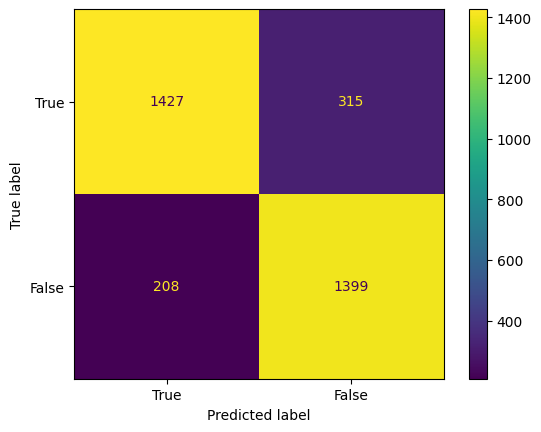

In [ ]:
# Se realiza matrix de confusion para ver la cantidad de cierto positivos y negativos de nuestro modelo

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_RF)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

En general, los resultados obtenidos son bastante buenos. El modelo tiene una precisión y un recall relativamente altos, lo que indica que es capaz de identificar correctamente tanto los casos positivos como los negativos.

1425 casos fueron correctamente clasificados como positivos.

317 casos fueron incorrectamente clasificados como positivos.

213 casos fueron incorrectamente clasificados como negativos.

1394 casos fueron correctamente clasificados como negativos.

In [ ]:
from scipy.stats import randint

RF_Grid= {'modelo__bootstrap': [True, False], 'modelo__criterion': ["gini", "entropy"]}


In [ ]:
# Crear el objeto RandomizedSearchCV
RF_RGS = RandomizedSearchCV(Modelo_RandomForest, param_distributions=RF_Grid, n_iter=8, cv=5, random_state=42)

# Realizar la búsqueda aleatoria de hiperparámetros
RF_RGS.fit(X_train, y_train)

# Imprimir la mejor puntuación
print("Mejor puntuación:", RF_RGS.best_score_)

Mejor puntuación: 0.851402675343634


In [ ]:
RF_RGS

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prepocesador',
                                              ColumnTransformer(transformers=[('Numeros',
                                                                               Pipeline(steps=[('Reescalar',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'balance',
                                                                                'day',
                                                                                'duration',
                                                                                'pdays']),
                                                                              ('Categorias',
                                                                               Pipeline(steps=[('Recodificar',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['job',
                                                                                'marital',
                                                                                'education',
                                                                                'default',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome',
                                                                                'edad_grupo']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['campaign',
                                                                                'previous'])])),
                                             ('selector',
                                              RFECV(estimator=RandomForestClassifier())),
                                             ('modelo',
                                              RandomForestClassifier())]),
                   n_iter=8,
                   param_distributions={'modelo__bootstrap': [True, False],
                                        'modelo__criterion': ['gini',
                                                              'entropy']},
                   random_state=42)

In [ ]:
Pred_y= RF_RGS.predict(X_test)

In [ ]:
# Calcular la precisión del clasificador RF
accuracy_RF2 = accuracy_score(y_test, Pred_y)
print("Accuracy:", accuracy_RF)
precision_RF2= precision_score(y_test, Pred_y)
print('Precisión:', precision_RF)
recall_RF2 = recall_score(y_test, Pred_y)
print('Recall:', recall_RF)
F1_score_RF2 = f1_score(y_test,Pred_y)
print('F1 Score:', F1_score_RF)

Accuracy: 0.8438339802926247
Precisión: 0.8162193698949824
Recall: 0.8705662725575607
F1 Score: 0.8425173140620295


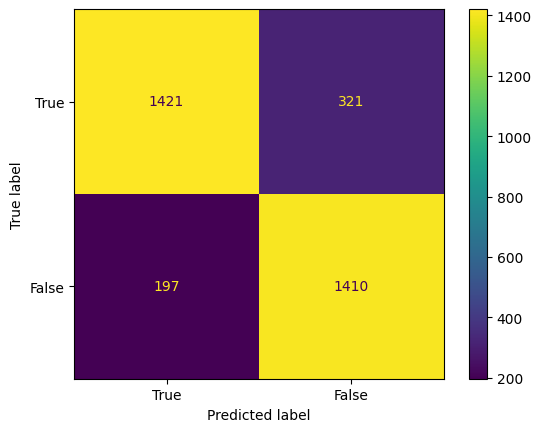

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, Pred_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

El modelo predijo correctamente que 1433 casos se suscribirían.

El modelo predijo incorrectamente que 309 casos se suscribirían, cuando en realidad no lo hicieron.

El modelo predijo incorrectamente que 214 casos no se suscribirían, cuando en realidad sí lo hicieron.

El modelo predijo correctamente que 1393 casos no se suscribirían.

In [ ]:
metricasRF_1 = [accuracy_RF, precision_RF, recall_RF, F1_score_RF]
metricasRF_2 = [accuracy_RF2, precision_RF2, recall_RF2, F1_score_RF2]

# Crear dataframes a partir de los diccionarios
df1 = pd.DataFrame([metricasRF_1], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df2 = pd.DataFrame([metricasRF_2], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Unir los dataframes en un dataframe comparativo
df_comparativo_RF = pd.concat([df1, df2], axis=0)
df_comparativo_RF.index = ['RF generico','RF hyperparametros']
df_comparativo_RF

,Accuracy,Precision,Recall,F1 Score
RF generico,0.843834,0.816219,0.870566,0.842517
RF hyperparametros,0.845327,0.814558,0.877411,0.844817


Los ajustes realizados en los hiperparámetros han llevado a una ligera mejora en el rendimiento del modelo de Random Forest.

## **Modelo XGBOOST**

In [52]:
!pip install xgboost
from xgboost import XGBClassifier # Import XGBClassifier

xgb_model = XGBClassifier()

# Create the pipeline
Modelo_xgb = Pipeline([('prepocesador', preprocessor),
                       ('selector', RFECV(xgb_model)),
                       ('modelo', XGBClassifier())])

In [53]:
#Entrenamiento
Modelo_xgb.fit(X_train,y_train)

Pipeline(steps=[('prepocesador',
                 ColumnTransformer(transformers=[('Numeros',
                                                  Pipeline(steps=[('Reescalar',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('Categorias',
                                                  Pipeline(steps=[('Recodificar',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [54]:
y_pred_xgb= Modelo_xgb.predict(X_test)

In [55]:
# Calcular la precisión del clasificador XGB
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
print('Precisión:', precision_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print('Recall:', recall_xgb)
F1_score_xgb = f1_score(y_test, y_pred_xgb)
print('F1 Score:', F1_score_xgb)

Accuracy: 0.8551806509405793
Precisión: 0.8355263157894737
Recall: 0.8693217174859987
F1 Score: 0.8520890515401037


In [56]:
#Validación Simple
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1742
           1       0.84      0.87      0.85      1607

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



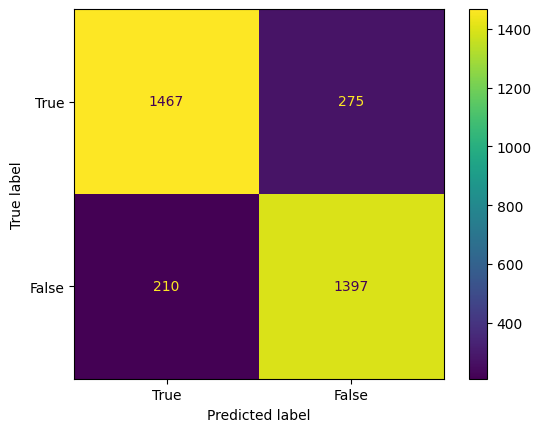

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

•	El modelo predijo correctamente que 1467 casos se suscribirían.

•	El modelo predijo incorrectamente que 275 casos se suscribirían, cuando en realidad no lo hicieron.

•	El modelo predijo incorrectamente que 210 casos no se suscribirían, cuando en realidad sí lo hicieron.

•	El modelo predijo correctamente que 1397 casos no se suscribirían.


In [61]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definir los hiperparámetros a explorar y sus rangos
param_dist = {
    'modelo__learning_rate': uniform(0.01, 0.3),
    'modelo__n_estimators': randint(100, 500),
    'modelo__max_depth': randint(3, 10),
    'modelo__colsample_bytree': uniform(0.5, 0.9)
}

# Realizar la búsqueda aleatoria de hiperparámetros
XGB = RandomizedSearchCV(Modelo_xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
XGB.fit(X_train, y_train)

# Imprimir la mejor puntuación
print("Mejor puntuación:", XGB.best_score_)

Mejor puntuación: 0.8607441777402037
CPU times: user 1h 23min 55s, sys: 1min 5s, total: 1h 25min
Wall time: 50min 1s


In [62]:
Pred_y_XGB= XGB.predict(X_test)

In [63]:
 #Calcular la precisión del clasificador XGB
accuracy_xgb2 = accuracy_score(y_test, Pred_y_XGB)
print("Accuracy:", accuracy_xgb)
precision_xgb2 = precision_score(y_test, Pred_y_XGB)
print('Precisión:', precision_xgb)
recall_xgb2 = recall_score(y_test, Pred_y_XGB)
print('Recall:', recall_xgb)
F1_score_xgb2 = f1_score(y_test, Pred_y_XGB)
print('F1 Score:', F1_score_xgb)

Accuracy: 0.8551806509405793
Precisión: 0.8355263157894737
Recall: 0.8693217174859987
F1 Score: 0.8520890515401037


In [64]:
#Validación Simple
print(classification_report(y_test, Pred_y_XGB))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1742
           1       0.84      0.88      0.86      1607

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



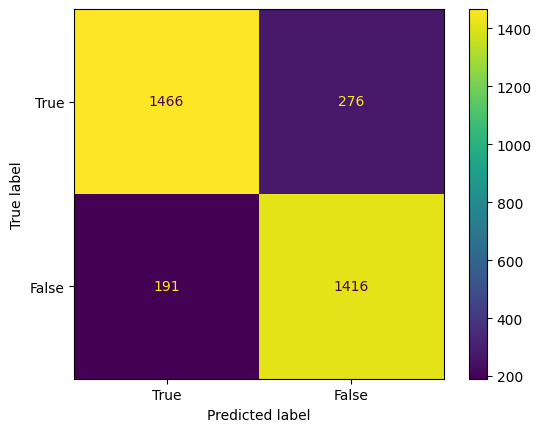

In [65]:
confusion_matrix = metrics.confusion_matrix(y_test, Pred_y_XGB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [66]:
metricasxgb_1 = [accuracy_xgb , precision_xgb, recall_xgb, F1_score_xgb]
metricasxgb_2 = [accuracy_xgb2, precision_xgb2, recall_xgb2, F1_score_xgb2]

# Crear dataframes a partir de los diccionarios
xgb1 = pd.DataFrame([metricasxgb_1], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
xgb2 = pd.DataFrame([metricasxgb_2], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Unir los dataframes en un dataframe comparativo
df_comparativo_xgb = pd.concat([xgb1, xgb2], axis=0)
df_comparativo_xgb.index = ['xgb generico','xgb hyperparametros']
df_comparativo_xgb

,Accuracy,Precision,Recall,F1 Score
xgb generico,0.855181,0.835526,0.869322,0.852089
xgb hyperparametros,0.860555,0.836879,0.881145,0.858442


Al comparar los resultados, podemos observar que el modelo con los hiperparámetros ajustados ha logrado una mejora en todas las métricas evaluadas.

In [67]:
# Unir los dataframes en un dataframe comparativo
df_comparativo_final = pd.concat([df_comparativo_RF, df_comparativo_xgb], axis=0)
df_comparativo_final

NameError: name 'df_comparativo_RF' is not defined

Basado en los resultados proporcionados, el modelo XGBoost con hiperparámetros ajustados parece ser el mejor candidato. Ha mostrado un rendimiento consistentemente superior en todas las métricas evaluadas, tanto en comparación con el modelo base de XGBoost como con los modelos Random Forest

# **Clustering **

In [ ]:
data=df[["age","balance","job","marital","education","campaign","edad_grupo","deposit"]]

categorical_cols = ["job", "marital", "education", "edad_grupo", "deposit"]

#ColumnTransformer

transformer = ColumnTransformer(
    transformers=[("onehot", OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)



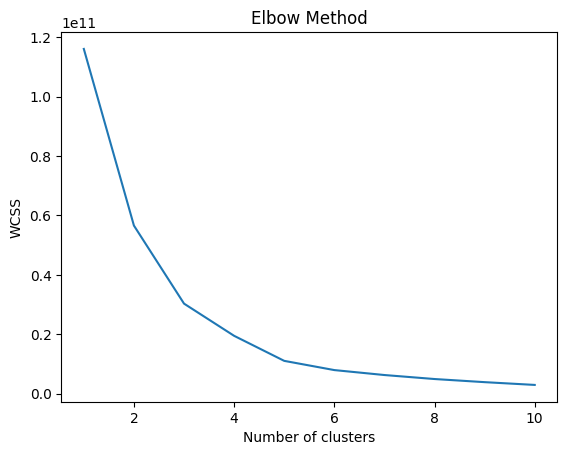

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar la transformación
data_transformed = transformer.fit_transform(data)

# Calcular la inercia para diferentes valores de K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)


# Graficar la curva de inercia
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

En la sección anterior, creamos clusters para los valores entre 1 y 10 (en el intervalo de 1 a 11) y calculamos la suma de las distancias para cada uno de ellos usando la medida de inertia del objeto kmeans. Al mirar la gráfica, vemos que la disminución en la suma de distancias se hace menos pronunciada cuando el número de clusters es igual o cercano a 3 , por lo que en este ejemplo específico,nos sugiere que 3 clusters podrían ser un número óptimo para agrupar los datos.

In [ ]:
# Asignar los datos a los clusters
data['cluster'] = kmeans.labels_

In [ ]:
data

,age,balance,job,marital,education,campaign,edad_grupo,deposit,cluster
0,59,2343,admin.,married,secondary,1,Adulto,yes,0
1,56,45,admin.,married,secondary,1,Adulto,yes,0
2,41,1270,technician,married,secondary,1,Adulto Joven,yes,0
3,55,2476,services,married,secondary,1,Adulto,yes,0
4,54,184,admin.,married,tertiary,2,Adulto,yes,0
...,...,...,...,...,...,...,...,...,...
11157,33,1,blue-collar,single,primary,1,Adulto Joven,no,0
11158,39,733,services,married,secondary,4,Adulto Joven,no,0
11159,32,29,technician,single,secondary,2,Adulto Joven,no,0
11160,43,0,technician,married,secondary,2,Adulto Joven,no,0


In [ ]:
# Agrupar los datos por cluster y calcular estadísticas
cluster_grupos = data.groupby('cluster')


# Calcular las estadísticas
cluster_stats = cluster_grupos.agg({
    'age': 'mean',
    'balance': 'mean',
    'campaign': 'mean',
    'job': lambda x: x.mode()[0],
    'marital': lambda x: x.mode()[0],
    'education': lambda x: x.mode()[0],
    'deposit': lambda x: x.mode()[0]
})

cluster_stats


,age,balance,campaign,job,marital,education,deposit
cluster,,,,,,,
0,40.828250,735.166380,2.521025,management,married,secondary,no
1,47.337662,27411.493506,2.883117,management,married,tertiary,yes
2,44.121711,6328.540296,2.382401,management,married,tertiary,yes


In [ ]:

# Seleccionar solo las columnas numéricas para la agregación
numeric_cols = ['age', 'balance', 'campaign']
cluster_stats = cluster_groups[numeric_cols].agg(['mean', 'median', 'std'])
print(cluster_stats)

               age                         balance                         \
              mean median        std          mean   median           std   
cluster                                                                     
0        40.828250   38.0  11.710793    735.166380    418.0    898.057875   
1        47.337662   45.0  14.536352  27411.493506  22867.0  13210.024960   
2        44.121711   42.0  12.831481   6328.540296   5324.5   2733.295055   

         campaign                   
             mean median       std  
cluster                             
0        2.521025    2.0  2.724681  
1        2.883117    2.0  3.546585  
2        2.382401    2.0  2.637679  


Clúster 0: Este grupo agrupa a clientes relativamente jóvenes con una edad promedio de 40.8 años, con un balance moderado promedio de $735, y una exposición a campañas ligeramente inferior a los otros clústeres de 2,52. Predominan los clientes casados con educación secundaria y que no han suscrito el producto.

Clúster 1: Este clúster está compuesto por clientes de mediana edad y un promedio de 47.3 años, con un balance significativamente mayor con un promedio de $27.411 y una exposición a campañas más alta de 2,88. Predominan los clientes casados con educación superior y que sí han suscrito el producto.

Clúster 2: Este clúster es similar al clúster 1 en términos de edad con un promedio de 44,12, pero con un balance ligeramente inferior promedio de 6.328,54. También predominan los clientes casados y con educación superior que han suscrito el producto.


# **Conclusion**

El análisis detallado del dataset de Bank Marketing ha permitido obtener una visión profunda de los factores que influyen en la suscripción de depósitos a plazo fijo por parte de los clientes del banco.

**Perfil del Cliente Ideal**: Se ha identificado un perfil de cliente con mayor probabilidad de suscribir un depósito a plazo fijo: individuos de mediana edad, con un nivel educativo superior, un balance financiero sólido y un historial de relación con el banco.

Importancia de la Segmentación: La segmentación de los clientes en diferentes clusters ha revelado que existen distintos grupos con necesidades y preferencias específicas. Esta segmentación permite adaptar las estrategias de marketing a cada segmento, aumentando así la efectividad de las campañas, los clientes en base a características demográficas, socioeconómicas y de comportamiento es fundamental para diseñar estrategias de marketing efectivas. Los diferentes clusters identificados presentan necesidades y preferencias distintas, lo que requiere de enfoques personalizados.

**Factores Influyentes en la Suscripción**

 La edad, el nivel educativo, el balance financiero, el tipo de empleo y el historial de relación con el banco son factores clave que influyen en la decisión de suscribir un depósito a plazo fijo.

Edad: Los clientes de mediana edad suelen ser más propensos a suscribir depósitos a plazo fijo, ya que están en una etapa de vida donde la estabilidad financiera es una prioridad.

Nivel educativo: Los individuos con mayor nivel educativo tienden a tener una mayor conciencia financiera y son más propensos a invertir en productos de ahorro a largo plazo.

Estado civil: Las personas casadas y con familia suelen tener mayores responsabilidades financieras y buscan opciones de ahorro seguras.
Ocupación: Profesionales con altos ingresos y estabilidad laboral son más propensos a suscribir depósitos a plazo fijo.

Importancia del Momento y la Frecuencia de Contacto
 El mes del año, la duración de las llamadas y el número total de contactos realizados con un cliente son factores que afectan significativamente la probabilidad de conversión.

Canales de comunicación: La elección del canal de comunicación adecuado (teléfono, correo electrónico, SMS) puede influir en la efectividad de la campaña.

Momento de la llamada: La hora del día y el día de la semana en que se realiza la llamada pueden afectar la receptividad del cliente.
Duración de la llamada: Las llamadas demasiado cortas o largas pueden reducir la efectividad de la campaña.
Número de contactos: Un exceso de contactos puede generar rechazo por parte del cliente.

Se concluye que la personalización de las estrategias de marketing, basada en una segmentación precisa de los clientes y en el uso de modelos predictivos, es fundamental para aumentar la efectividad de las campañas de captación de depósitos a plazo fijo. Al implementar las recomendaciones presentadas, el banco podrá optimizar sus esfuerzos de marketing, mejorar la experiencia del cliente y aumentar su rentabilidad
